In [1]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [2]:
''' Binning the weighted velocity data '''

df = pd.read_csv("linuxData/galaxyData.csv", delimiter=",")

# Only getting galaxies with particles
df = df[df["Particles"] == True]
df["N Particles"] = pd.to_numeric(df["N Particles"])
df = df[df["N Particles"] > 0]

# Logging the mass and star formation rates
df["Mass"] = np.log10(df["Mass"])
df["Star Formation Rate"] = np.log10(df["Star Formation Rate"])

# Creating bins
binNum = 10
df["Binned Mass"], massBinVals = pd.cut(df["Mass"], binNum, retbins=True)
df["Binned Sfr"], sfrBinVals = pd.cut(df["Star Formation Rate"], binNum, retbins=True)

massBins = np.unique(df["Binned Mass"])
sfrBins = np.unique(df["Binned Sfr"])

# Creating grid for plotting
x, y = np.meshgrid(massBinVals, sfrBinVals)
z = np.zeros((binNum, binNum))

# Assigning velocities to the grid
for m in range(binNum):
    for s in range(binNum):
        vels = df[df["Binned Mass"] == massBins[m]]
        vels = vels[vels["Binned Sfr"] == sfrBins[s]]

        z[m][s] = np.mean(vels["Velocity"].to_numpy(dtype=np.float64))

c:\Users\Matth\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\Users\Matth\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Matth\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Matth\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Matth\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered i

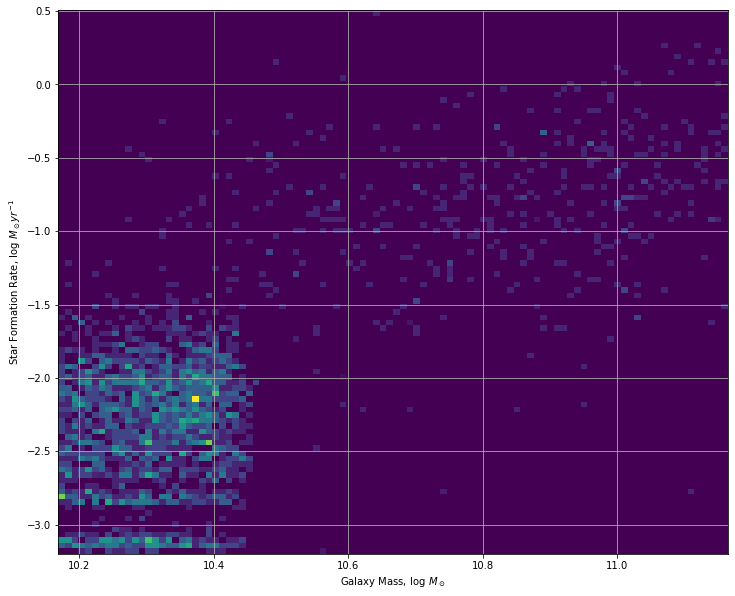

In [11]:
''' Plotting the binned data '''

plt.figure(figsize=(12,10))    
#ax = plt.pcolormesh(x, y, z, norm=mpl.colors.LogNorm())
#ax = plt.pcolormesh(x, y, z)
#plt.colorbar()
plt.xlabel("Galaxy Mass, $\log \: M_\odot$")
plt.ylabel("Star Formation Rate, $\log \: M_\odot yr^{-1}$")

plt.hist2d(df["Mass"].to_numpy(dtype="float"), df["Star Formation Rate"].to_numpy(dtype="float"), bins=100)
plt.grid()

(array([25183., 30682., 20935.,  1559.,  1409.,  1874.,  1850.,  2196.,
         2701.,  1873.]),
 array([10.16922913, 10.268753  , 10.36827686, 10.46780073, 10.56732459,
        10.66684845, 10.76637232, 10.86589618, 10.96542004, 11.06494391,
        11.16446777]),
 <BarContainer object of 10 artists>)

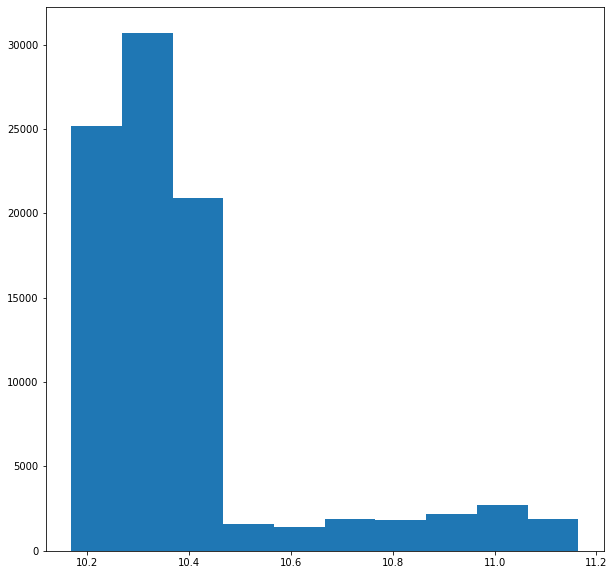

In [4]:
plt.figure(figsize=(10,10))
#plt.plot(df["Mass"].to_numpy(dtype="float"), df["Star Formation Rate"].to_numpy(dtype="float"), "ko", alpha=0.1)
plt.hist(df["Mass"])

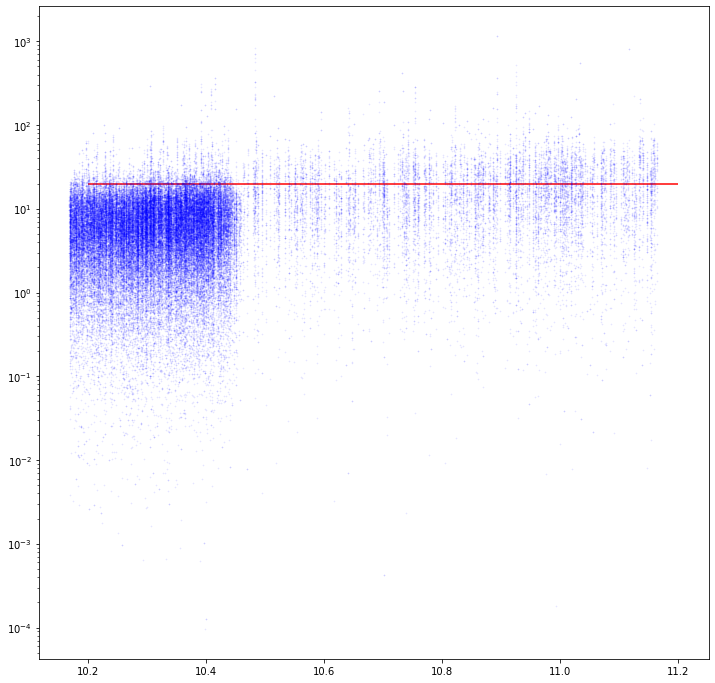

In [5]:
plt.figure(figsize=(12,12))
plt.plot(df["Mass"].to_numpy(dtype="float"), abs(df["Velocity"].to_numpy(dtype="float")), "bx", markersize=1, alpha=0.1)
plt.yscale("log")
plt.hlines(20, 10.2, 11.2, "r")
#plt.hlines(-20, 10.2, 11.2, "r")


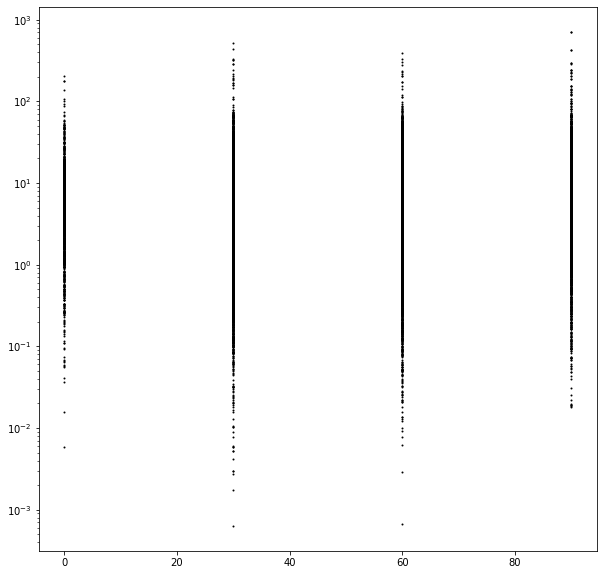

In [11]:
plt.figure(figsize=(10,10))
plt.plot(df["Inclination"].to_numpy(dtype="float"), df["Velocity"].to_numpy(dtype="float"), "ko", markersize=1)
plt.yscale("log")

In [34]:
''' Loading in the spectrum data '''

d = np.loadtxt("spectrumData.txt", skiprows=1, delimiter=",")

plt.hist(d)

ValueError: Wrong number of columns at line 20